In [42]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [43]:
sns.set_theme()

In [44]:
movies = pd.read_csv('movies.csv')
movies.head()

,Title,Runtime,Genre,Awards,Box_office
0,Parasite,132 min,"Comedy, Drama, Thriller",Won 4 Oscars. 312 wins & 275 nominations total,"$53,369,749"
1,Green Book,130 min,"Biography, Comedy, Drama",Won 3 Oscars. 58 wins & 123 nominations total,"$85,080,171"
2,The Shape of Water,123 min,"Drama, Fantasy, Romance",Won 4 Oscars. 138 wins & 357 nominations total,"$63,859,435"
3,Moonlight,111 min,Drama,Won 3 Oscars. 228 wins & 294 nominations total,"$27,854,932"
4,Spotlight,129 min,"Biography, Crime, Drama",Won 2 Oscars. 124 wins & 143 nominations total,"$45,055,776"


In [45]:
#separate awards won and nominations by splitting into two columns using the separator "&"

new = movies.Awards.str.split(r"&", n=-1, expand=True)
movies["Awards_won"]=new[0]
movies["Award_Nominations"]=new[1]
movies.drop(columns=['Awards'], inplace=True)
movies 

,Title,Runtime,Genre,Box_office,Awards_won,Award_Nominations
0,Parasite,132 min,"Comedy, Drama, Thriller","$53,369,749",Won 4 Oscars. 312 wins,275 nominations total
1,Green Book,130 min,"Biography, Comedy, Drama","$85,080,171",Won 3 Oscars. 58 wins,123 nominations total
2,The Shape of Water,123 min,"Drama, Fantasy, Romance","$63,859,435",Won 4 Oscars. 138 wins,357 nominations total
3,Moonlight,111 min,Drama,"$27,854,932",Won 3 Oscars. 228 wins,294 nominations total
4,Spotlight,129 min,"Biography, Crime, Drama","$45,055,776",Won 2 Oscars. 124 wins,143 nominations total
5,Birdman or (The Unexpected Virtue of Ignorance),119 min,"Comedy, Drama","$42,340,598",Won 4 Oscars. 193 wins,291 nominations total
6,12 Years a Slave,134 min,"Biography, Drama, History","$56,671,993",Won 3 Oscars. 242 wins,336 nominations total
7,Argo,120 min,"Biography, Drama, Thriller","$136,025,503",Won 3 Oscars. 94 wins,156 nominations total
8,The Artist,100 min,"Comedy, Drama, Romance","$44,671,682",Won 5 Oscars. 162 wins,204 nominations total
9,The King's Speech,118 min,"Biography, Drama, History","$138,797,449",Won 4 Oscars. 108 wins,206 nominations total


In [46]:
# convert awards won by separating oscars (all just one digit), and other awards (all > 2 digits). Then combine to make a "total_awards" column.

movies['Oscars_won'] = movies.Awards_won.str.extract('(\d{1})').astype(int)
movies['Other_awards'] = movies.Awards_won.str.extract('(\d{2,})').astype(int)
movies['Total_awards'] = movies.Oscars_won + movies.Other_awards
movies.drop(columns=['Awards_won'], inplace=True)
movies


,Title,Runtime,Genre,Box_office,Award_Nominations,Oscars_won,Other_awards,Total_awards
0,Parasite,132 min,"Comedy, Drama, Thriller","$53,369,749",275 nominations total,4,312,316
1,Green Book,130 min,"Biography, Comedy, Drama","$85,080,171",123 nominations total,3,58,61
2,The Shape of Water,123 min,"Drama, Fantasy, Romance","$63,859,435",357 nominations total,4,138,142
3,Moonlight,111 min,Drama,"$27,854,932",294 nominations total,3,228,231
4,Spotlight,129 min,"Biography, Crime, Drama","$45,055,776",143 nominations total,2,124,126
5,Birdman or (The Unexpected Virtue of Ignorance),119 min,"Comedy, Drama","$42,340,598",291 nominations total,4,193,197
6,12 Years a Slave,134 min,"Biography, Drama, History","$56,671,993",336 nominations total,3,242,245
7,Argo,120 min,"Biography, Drama, Thriller","$136,025,503",156 nominations total,3,94,97
8,The Artist,100 min,"Comedy, Drama, Romance","$44,671,682",204 nominations total,5,162,167
9,The King's Speech,118 min,"Biography, Drama, History","$138,797,449",206 nominations total,4,108,112


In [47]:
# convert nominations into int by extracting int with regex
movies.Award_Nominations = movies.Award_Nominations.str.extract('(\d+)').astype(int)



In [48]:
# convert runtime to int using .extract()
movies.Runtime = movies.Runtime.str.extract('(\d+)').astype(int)


In [49]:
#convert Box office earnings to int by using extractall(), unstacking
movies.Box_office = movies.Box_office.str.extractall('(\d+)').unstack().sum(axis=1).astype(int) # help from https://www.pauldesalvo.com/how-to-extract-all-numbers-from-a-string-column-in-python-pandas/
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              10 non-null     object
 1   Runtime            10 non-null     int32 
 2   Genre              10 non-null     object
 3   Box_office         10 non-null     int32 
 4   Award_Nominations  10 non-null     int32 
 5   Oscars_won         10 non-null     int32 
 6   Other_awards       10 non-null     int32 
 7   Total_awards       10 non-null     int32 
dtypes: int32(6), object(2)
memory usage: 528.0+ bytes


In [50]:
movies.shape

(10, 8)

## QUESTIONS:
* Runtime for each movie (graph)
    * which movie had the longest runtime? 
* relationship between length of movie and number of awards won? 
* awards and nominations for each movie (graph) 


### Comparing Movie Runtimes

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '12 Years a Slave'),
  Text(0, 1, 'Parasite'),
  Text(0, 2, 'Green Book'),
  Text(0, 3, 'Spotlight'),
  Text(0, 4, 'The Shape of Water'),
  Text(0, 5, 'Argo'),
  Text(0, 6, 'Birdman or (The Unexpected Virtue of Ignorance)'),
  Text(0, 7, "The King's Speech"),
  Text(0, 8, 'Moonlight'),
  Text(0, 9, 'The Artist')])

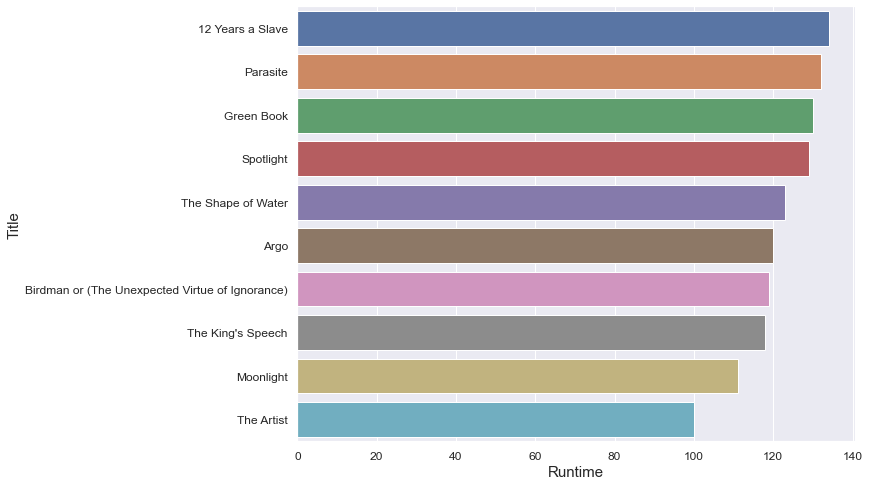

In [51]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=movies, x=movies.Runtime, y=movies.Title, order=movies.sort_values('Runtime', ascending=False).Title)
plt.xlabel('Runtime', size=15)
plt.xticks(fontsize=12)
plt.ylabel('Title', size=15)
plt.yticks(fontsize=12)

The graph above shows the runtime, in descending order, for the movies in the dataset. The longest movie is **12 Years a Slave**, which is 134 minutes long.

### Movie Runtime vs. Awards won

<AxesSubplot:xlabel='Runtime', ylabel='Total_awards'>

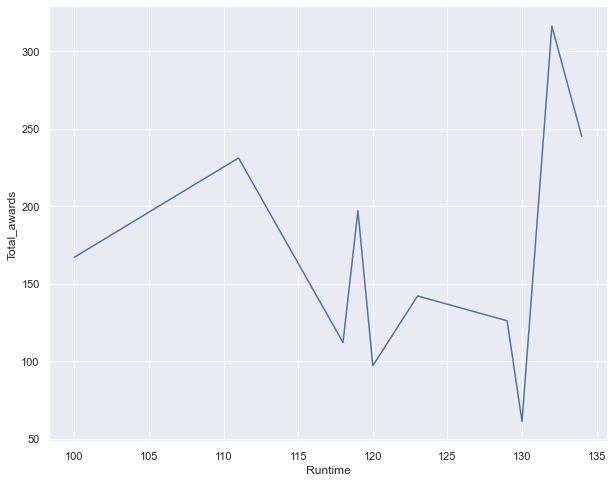

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=movies, x='Runtime', y='Total_awards')


According to the line chart above, there does **not** appear to be a significant correlation between movie runtime and total awards won. 

### Awards and Nominations

In [69]:
movies

,Title,Runtime,Genre,Box_office,Award_Nominations,Oscars_won,Other_awards,Total_awards
0,Parasite,132,"Comedy, Drama, Thriller",53369749,275,4,312,316
1,Green Book,130,"Biography, Comedy, Drama",85080171,123,3,58,61
2,The Shape of Water,123,"Drama, Fantasy, Romance",63859435,357,4,138,142
3,Moonlight,111,Drama,27854932,294,3,228,231
4,Spotlight,129,"Biography, Crime, Drama",45055776,143,2,124,126
5,Birdman or (The Unexpected Virtue of Ignorance),119,"Comedy, Drama",42340598,291,4,193,197
6,12 Years a Slave,134,"Biography, Drama, History",56671993,336,3,242,245
7,Argo,120,"Biography, Drama, Thriller",136025503,156,3,94,97
8,The Artist,100,"Comedy, Drama, Romance",44671682,204,5,162,167
9,The King's Speech,118,"Biography, Drama, History",138797449,206,4,108,112


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Green Book'),
  Text(0, 1, 'Argo'),
  Text(0, 2, "The King's Speech"),
  Text(0, 3, 'Spotlight'),
  Text(0, 4, 'The Shape of Water'),
  Text(0, 5, 'The Artist'),
  Text(0, 6, 'Birdman or (The Unexpected Virtue of Ignorance)'),
  Text(0, 7, 'Moonlight'),
  Text(0, 8, '12 Years a Slave'),
  Text(0, 9, 'Parasite')])

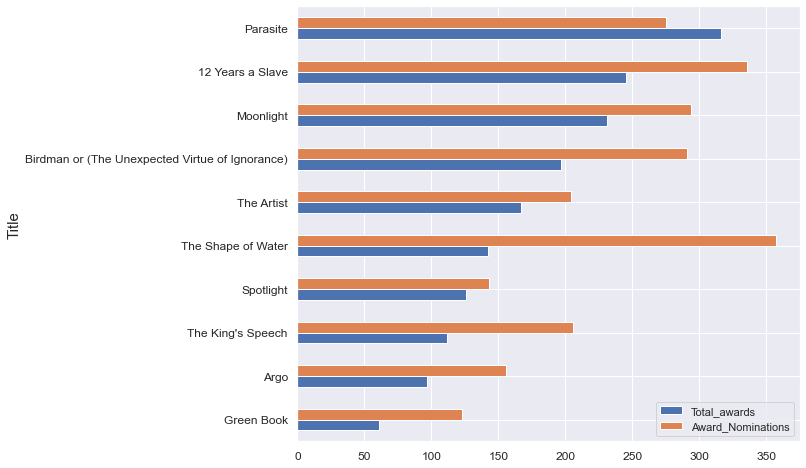

In [70]:

movies.sort_values(by='Total_awards', ascending=True).plot.barh(y=['Total_awards', 'Award_Nominations'], x='Title', figsize=(9,8))
plt.xlabel('', size=15)
plt.xticks(fontsize=12)
plt.ylabel('Title', size=15)
plt.yticks(fontsize=12)

The clustered bar chart above shows the total nominations and awards won for each movie in the data set. **Parasite** won the most total awards with 316, while **The Shape of Water** had the most nominations with 357.